In [1]:
import numpy as np
import matplotlib.pyplot as plt
from make_curved_hexagon import Round_Hexagon
rad=5
rh = Round_Hexagon(rad=rad)
shapefile_original = np.loadtxt('shape.dat', skiprows=7)

In [ ]:
def round_yz(shape_org):
    newshape_yz = []
    sortedx = sorted(list(set(shape_org[:,0])))
    total_points = 0
    for xslice in sortedx:
        slicei = np.where(shape_org[:,0] == xslice)[0]
        ptns_without_1, _ = rh.remove_yz1(sharpcorners=shape_org[slicei,:])
        ptns_without_2, _ = rh.remove_yz2(sharpcorners=ptns_without_1)
        ptns_without_3, _ = rh.remove_yz3(sharpcorners=ptns_without_2)
        ptns_without_4, _ = rh.remove_yz4(sharpcorners=ptns_without_3)
        ptns_without_5, _ = rh.remove_yz5(sharpcorners=ptns_without_4)
        ptns_without_6, _ = rh.remove_yz6(sharpcorners=ptns_without_5)
        newshape_yz.append(ptns_without_6)
        total_points += len(ptns_without_6)
    shape_curved_yz = np.zeros((total_points, 4))
    num_in_slice = newshape_yz[0].shape[0]
    for i in range(len(newshape_yz)):
        shape_curved_yz[i*num_in_slice : num_in_slice*(i+1),0] = newshape_yz[i][:,0]
        shape_curved_yz[i*num_in_slice : num_in_slice*(i+1),1] = newshape_yz[i][:,1]
        shape_curved_yz[i*num_in_slice : num_in_slice*(i+1),2] = newshape_yz[i][:,2]
        shape_curved_yz[i*num_in_slice : num_in_slice*(i+1),3] = newshape_yz[i][:,3]
    return shape_curved_yz

def round_xy(shape_org):
    newshape_xy = []
    sortedz = sorted(list(set(shape_org[:,2])))
    total_points = 0
    for zslice in sortedz:
        slicei = np.where(shape_org[:, 2] == zslice)[0]
        ptns_without_1, _ = rh.remove_yx1(sharpcorners=shape_org[slicei,:])
        ptns_without_2, _ = rh.remove_yx2(sharpcorners=ptns_without_1)
        ptns_without_3, _ = rh.remove_yx3(sharpcorners=ptns_without_2)
        ptns_without_4, _ = rh.remove_yx4(sharpcorners=ptns_without_3)
        newshape_xy.append(ptns_without_4)
        total_points += len(ptns_without_4)
    shape_curved_xy = np.zeros((total_points, 4))
    num_upto_prev_slice = 0
    for i in range(len(newshape_xy)):
        num_in_curr_slice = len(newshape_xy[i][:,0])
        shape_curved_xy[num_upto_prev_slice : num_upto_prev_slice+num_in_curr_slice, 0] = newshape_xy[i][:,0]
        shape_curved_xy[num_upto_prev_slice : num_upto_prev_slice+num_in_curr_slice, 1] = newshape_xy[i][:,1]
        shape_curved_xy[num_upto_prev_slice : num_upto_prev_slice+num_in_curr_slice, 2] = newshape_xy[i][:,2]
        shape_curved_xy[num_upto_prev_slice : num_upto_prev_slice+num_in_curr_slice, 3] = newshape_xy[i][:,3]
        num_upto_prev_slice = num_upto_prev_slice + num_in_curr_slice
    return shape_curved_xy


def round_xz(shape_org):
    newshape_xz = []
    sortedy = sorted(list(set(shape_org[:,1])))
    total_points = 0
    for yslice in sortedy:
        slicei = np.where(shape_org[:, 1] == yslice)[0]
        ptns_without_1, _ = rh.remove_zx1(sharpcorners=shape_org[slicei,:])
        ptns_without_2, _ = rh.remove_zx2(sharpcorners=ptns_without_1)
        ptns_without_3, _ = rh.remove_zx3(sharpcorners=ptns_without_2)
        ptns_without_4, _ = rh.remove_zx4(sharpcorners=ptns_without_3)
        newshape_xz.append(ptns_without_4)
        total_points += len(ptns_without_4)
    shape_curved_xz = np.zeros((total_points, 4))
    num_upto_prev_slice = 0
    for i in range(len(newshape_xz)):
        num_in_curr_slice = len(newshape_xz[i][:,0])
        shape_curved_xz[num_upto_prev_slice : num_upto_prev_slice+num_in_curr_slice, 0] = newshape_xz[i][:,0]
        shape_curved_xz[num_upto_prev_slice : num_upto_prev_slice+num_in_curr_slice, 1] = newshape_xz[i][:,1]
        shape_curved_xz[num_upto_prev_slice : num_upto_prev_slice+num_in_curr_slice, 2] = newshape_xz[i][:,2]
        shape_curved_xz[num_upto_prev_slice : num_upto_prev_slice+num_in_curr_slice, 3] = newshape_xz[i][:,3]
        num_upto_prev_slice = num_upto_prev_slice+num_in_curr_slice
    return shape_curved_xz

rounded_yz = round_yz(shape_org=shapefile_original[:,1:5]) 
rounded_xy = round_xy(shape_org=rounded_yz) 
all_rounded = round_xz(shape_org=rounded_xy) 

In [6]:
print(len(shapefile_original[:,1:5]))
print(len(all_rounded))

120747
116373


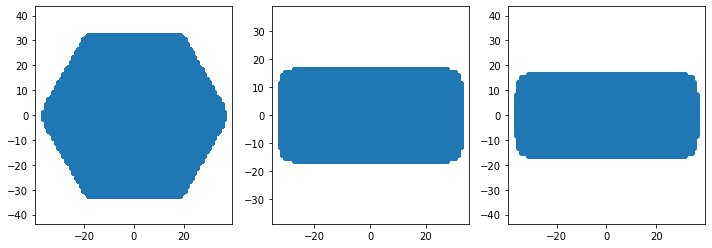

In [3]:
fig, ax = plt.subplots(1,3, figsize=[12,4])
ax[0].scatter(all_rounded[:,1], all_rounded[:,2])
ax[0].axis('equal');

ax[1].scatter(all_rounded[:,2], all_rounded[:,0])
ax[1].axis('equal');

ax[2].scatter(all_rounded[:,1], all_rounded[:,0])
ax[2].axis('equal');

In [4]:
## Rewrite shape file with curves
file = open('shape_curved.dat','w')

N = all_rounded.shape[0]
x = all_rounded[:,0]
y = all_rounded[:,1]
z = all_rounded[:,2]
ICOMP = all_rounded[:,3]

file.write(str(' Hexagon with rounded corners, r = ') + str(rad) + '\n')
file.write('\t' + str(N) + str(' = number of dipoles in target') + '\n')
file.write(str(' 1.000000 0.000000 0.000000 = A_1 vector') + '\n')
file.write(str(' 0.000000 1.000000 0.000000 = A_2 vector') + '\n')
file.write(str(' 1.000000 1.000000 1.000000 = (d_x,d_y,d_z)/d') + '\n')
file.write(str(' 0.000000 0.000000 0.000000 = (x,y,z)/d') + '\n')
file.write(str(' JA  IX  IY  IZ ICOMP(x,y,z)') + '\n')
count = 0
for j in range(0, N):
    count = count+1
    file.write('\t' + str(count) + '\t' + str(int(x[j])) + '\t' + str(int(y[j])) + '\t' + str(int(z[j])) + '\t' + str(int(ICOMP[j])) + '\t' + str(int(ICOMP[j])) + '\t' + str(int(ICOMP[j])) + '\n')
file.close()


